# 1. Training Several Different Linear Models (Full Dataset)

## Testing model training - exploration

### LinearRegression - Training model on Numerical Columns only --> Low Score 0.29

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
postcodes = pd.read_csv('data/zipcode-belgium.csv')
postcodes = postcodes.drop(columns=['lat', 'long'])
postcodes.head()

,postcode,locality
0,1000,Bruxelles
1,1020,Laeken
2,1030,Schaerbeek
3,1040,Etterbeek
4,1050,Ixelles


In [3]:
df = pd.read_csv('data/cleaned.csv').drop('Unnamed: 0', axis=1)
df.drop_duplicates()

numerical_cols = ['price','number_rooms', 'living_area', 'fireplace', 'furnished', 'terrace', 'garden', 'terrace_area', 'garden_area', 'surface_land', 'number_facades', 'swimming_pool', 'latitude', 'longitude']
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province','locality', 'postcode']

In [4]:
postalcode_merge_df = pd.merge(postcodes, df, on='locality', how='left')
postalcode_merge_df.drop_duplicates()

df = postalcode_merge_df.dropna()
df.head(500)

,postcode,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
0,1000,Bruxelles,HOUSE,HOUSE,698000.0,3.0,200.0,USA_HYPER_EQUIPPED,0.0,0.0,...,1.0,500.0,600.0,4.0,0.0,AS_NEW,Brussels,Brussels,50.846557,4.351697
1,1000,Bruxelles,HOUSE,VILLA,650000.0,4.0,270.0,SEMI_EQUIPPED,0.0,0.0,...,1.0,300.0,713.0,4.0,0.0,TO_RENOVATE,Brussels,Brussels,50.846557,4.351697
2,1000,Bruxelles,HOUSE,HOUSE,499000.0,4.0,155.0,HYPER_EQUIPPED,0.0,0.0,...,1.0,75.0,210.0,2.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
3,1000,Bruxelles,APARTMENT,APARTMENT,385000.0,2.0,88.0,USA_INSTALLED,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
4,1000,Bruxelles,APARTMENT,APARTMENT,365000.0,5.0,134.0,INSTALLED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1080,Molenbeek-Saint-Jean,APARTMENT,APARTMENT,174000.0,1.0,65.0,NOT_DEFINED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,GOOD,Brussels,Brussels,50.854596,4.338636
496,1080,Molenbeek-Saint-Jean,HOUSE,APARTMENT_BLOCK,599000.0,5.0,300.0,HYPER_EQUIPPED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,AS_NEW,Brussels,Brussels,50.854596,4.338636
497,1080,Molenbeek-Saint-Jean,HOUSE,APARTMENT_BLOCK,699000.0,4.0,160.0,NOT_DEFINED,0.0,0.0,...,0.0,0.0,500.0,2.0,0.0,UNKNOWN,Brussels,Brussels,50.854596,4.338636
498,1080,Molenbeek-Saint-Jean,APARTMENT,APARTMENT,249000.0,2.0,100.0,INSTALLED,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,UNKNOWN,Brussels,Brussels,50.854596,4.338636


In [5]:
df.columns
df.isna().sum()

postcode            0
locality            0
property_type       0
property_subtype    0
price               0
number_rooms        0
living_area         0
kitchen             0
furnished           0
fireplace           0
terrace             0
terrace_area        0
garden              0
garden_area         0
surface_land        0
number_facades      0
swimming_pool       0
building_state      0
region              0
province            0
latitude            0
longitude           0
dtype: int64

In [6]:
X = df[numerical_cols].drop(columns=['price'], axis=1)
y = df['price']

2023-07-19 16:49:27.622326: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-19 16:49:27.623979: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 16:49:27.662360: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 16:49:27.663693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 16:49:28.434347: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 104710.9057
Mean squared error = 19800474035.9891
Median absolute error = 81523.7363
Explain variance score = 0.3249
R2 score *coefficient of Determination = 0.3248
--------------------------------------
TRAINING SCORE: 0.3198685017112771
TESTING SCORE: 0.32475497377237195
--------------------------------------
Cross validation scores: 
 [0.30916907 0.33427278 0.28984602 0.31961163 0.31813816]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


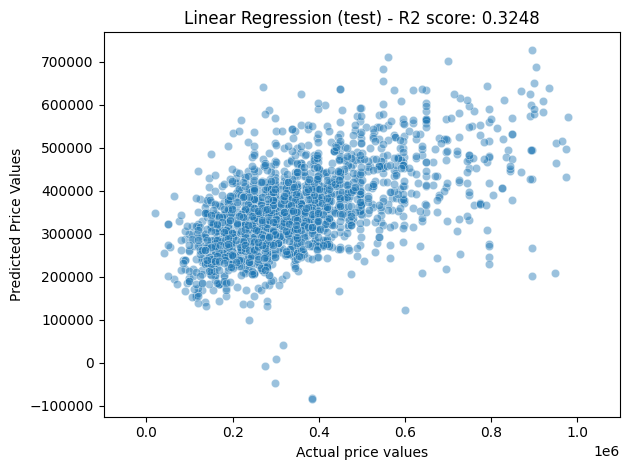

(array([309185.47639413, 296996.70891863, 286141.13079803, ...,
        458390.05800396, 538695.43126882, 341267.95293546]),
 622     325000.0
 2013    365000.0
 8103    345750.0
 1873    269000.0
 5105    174900.0
           ...   
 1470    525000.0
 3241    475000.0
 9962    275000.0
 7388    425000.0
 8257    745000.0
 Name: price, Length: 1889, dtype: float64)

In [7]:
from src.model_functions import train_linear_regr

train_linear_regr(X, y, 'Linear Regression (test)')

### Dropping less correlated numerical columns

In [8]:
df[numerical_cols].corr()['price'].sort_values(ascending=False)

price             1.000000
living_area       0.520740
number_rooms      0.409525
surface_land      0.237257
number_facades    0.175345
fireplace         0.136150
garden            0.134182
terrace_area      0.117371
terrace           0.113510
swimming_pool     0.096904
garden_area       0.092524
latitude          0.007480
furnished        -0.004397
longitude        -0.068915
Name: price, dtype: float64

In [9]:
numerical_cols = ['price','number_rooms', 'living_area', 'surface_land', 'number_facades', 'latitude', 'longitude']
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province',]

X = df[numerical_cols].drop(columns=['price'], axis=1)
y = df['price']

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 107053.6427
Mean squared error = 20428408197.1658
Median absolute error = 84334.0351
Explain variance score = 0.3036
R2 score *coefficient of Determination = 0.3033
--------------------------------------
TRAINING SCORE: 0.29835250972920613
TESTING SCORE: 0.303340869324048
--------------------------------------
Cross validation scores: 
 [0.29037349 0.32366242 0.27663235 0.28491522 0.29790427]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


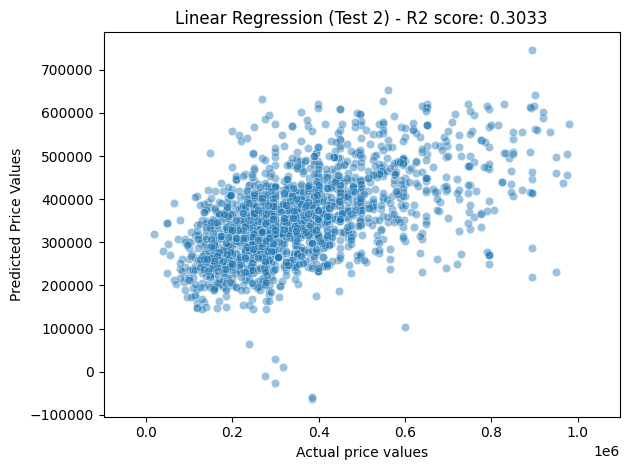

(array([331516.96454738, 325205.24162774, 280253.8486809 , ...,
        461396.13031726, 499466.73584544, 344304.6582419 ]),
 622     325000.0
 2013    365000.0
 8103    345750.0
 1873    269000.0
 5105    174900.0
           ...   
 1470    525000.0
 3241    475000.0
 9962    275000.0
 7388    425000.0
 8257    745000.0
 Name: price, Length: 1889, dtype: float64)

In [10]:
from src.model_functions import train_linear_regr

train_linear_regr(X, y, 'Linear Regression (Test 2)')

# 2. Selecting columns + insert Dummies


In [11]:
# Add the first 2 numbers of the postcode to the dataframe - see if any improvement in model
# NOTE: very slight increase in model performance - but training time is more than doubled - opted not to use this feature
df['postcode_abbr'] = df['postcode'].apply(lambda x: int(x/100))

/tmp/ipykernel_50029/1684750387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['postcode_abbr'] = df['postcode'].apply(lambda x: int(x/100))


In [12]:
# including Locality to see if any difference ==> LOCALITY HAS NEGATIVE INFLUENCE7
# Included poistcode - negative influence on the models overall
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province']
numerical_cols = ['price','number_rooms', 'living_area', 'surface_land', 'number_facades','latitude','longitude']

dummies = pd.get_dummies(df[cat_cols], columns=cat_cols)

new_df = pd.concat([df[numerical_cols], dummies], axis=1)
new_df.reset_index().drop(columns=['index'], inplace=True)

## Linear Regression --> score: 0.58

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 81351.5961
Mean squared error = 12297112277.8925
Median absolute error = 62936.0
Explain variance score = 0.5807
R2 score *coefficient of Determination = 0.5806
--------------------------------------
TRAINING SCORE: 0.5798523419274266
TESTING SCORE: 0.5806381257581426
--------------------------------------
Cross validation scores: 
 [ 5.46282314e-01  5.71468932e-01  5.75577116e-01 -3.71900837e+18
  5.84860200e-01]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


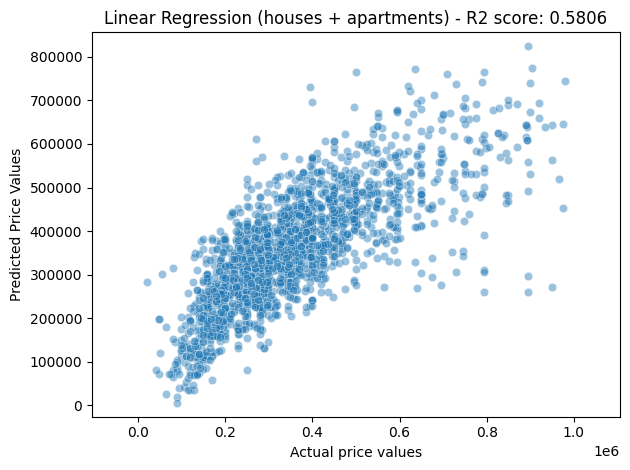

In [13]:
from src.model_functions import train_linear_regr

X = new_df.drop(columns=['price'], axis=1)
y = new_df['price']

#Training the Linear Model (LinearRegression) - and normalize the data with MinMaxScaler
y_preds, y_test = train_linear_regr(X, y, 'Linear Regression (houses + apartments)')


## Model K-Nearest Neighbour --> score: 0.58

In [14]:
from src.model_functions import train_knn_regr

X = new_df.drop(columns=['price'], axis=1)
y = new_df['price']

In [15]:
# Train the model (KNeighborsRegressor) with n_neighbors as 14 (see gridsearch below- best ne niegnbours)
# params = {'n_neighbors':14}
# print("Scores for the initial training (Without GridSearch)")
# model, X_train, X_test, y_train, y_test = train_knn_regr(X, y, 'KNN Regression (houses + apartments)', **params)

# # implementing GridSearch
# # Check for the best n_neighbor and other hyperparameters

# from sklearn.model_selection import GridSearchCV

# params = {"n_neighbors": np.arange(10,15), 
#           "metric": ["euclidean", "cityblock"],
#           "weights":['uniform', 'distance'],
#           "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

# print('Calculating best parameters through GridSearchCV. . .')
# grid = GridSearchCV(estimator=model,param_grid=params)
# grid.fit(X_train, y_train)
# print(f'Best score: {grid.best_score_}')

# # Retrain the model with the optimal parameters

# best_params = grid.best_estimator_.get_params()
# print(f"The Best parameters found from GridSearchCV: {best_params}")

# model, X_train, X_test, y_train, y_test = train_knn_regr(X, y, 'KNN Regression (houses + apartments GridSearch)', **best_params)


## Polynomial regresssion (NOT useful if degree > 1) --> score: 0.58

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 81388.4431
Mean squared error = 12293731981.4246
Median absolute error = 63160.0
Explain variance score = 0.5808
R2 score *coefficient of Determination = 0.5808
--------------------------------------
TRAINING SCORE: 0.5797632268322961
TESTING SCORE: 0.5807534022092531
--------------------------------------


Cross validation scores: 
 [ 5.46363938e-01  5.64277058e-01  5.75489573e-01 -1.36473359e+19
  5.84826173e-01]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


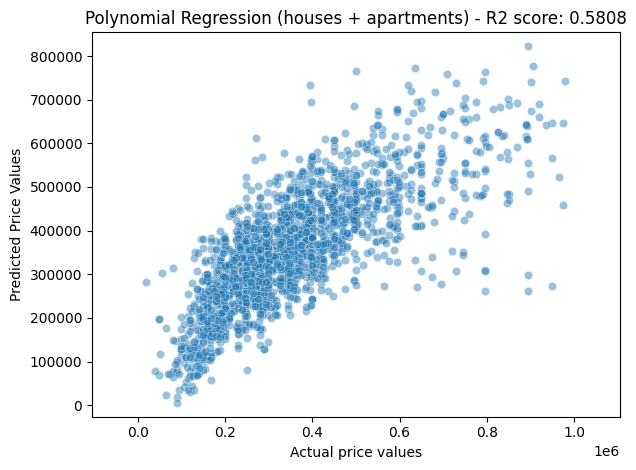

In [16]:
from src.model_functions import train_polynomial_regr

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

degree = 1
train_polynomial_regr(X, y, degree, 'Polynomial Regression (houses + apartments)')

## Huberregressor --> score: 0.57

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 79367.9613
Mean squared error = 12555310794.4747
Median absolute error = 59735.0762
Explain variance score = 0.5765
R2 score *coefficient of Determination = 0.5718
--------------------------------------
TRAINING SCORE: 0.5656109149823432
TESTING SCORE: 0.5718329191865958
--------------------------------------
Cross validation scores: 
 [0.53574942 0.56348767 0.55205963 0.56352555 0.5820735 ]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


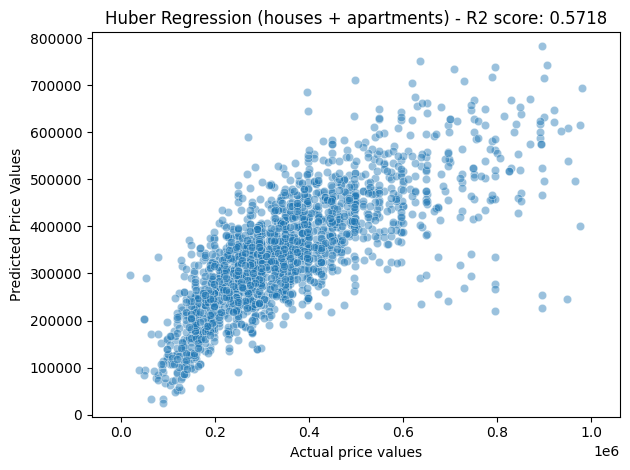

In [17]:
from src.model_functions import train_huberregressor

train_huberregressor(X,y, 'Huber Regression (houses + apartments)')

## Decision Tree Regressor --> score: 0.56

In [19]:
from src.model_functions import train_decessiontree_regression

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

#train_decessiontree_regression(X, y, 'Decision Tree Regression (houses + apartments)')

## Xgboost Regression --> score: 0.80

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 54885.9907
Mean squared error = 5845267189.5407
Median absolute error = 39387.2656
Explain variance score = 0.8035
R2 score *coefficient of Determination = 0.8034
--------------------------------------
TRAINING SCORE: 0.9310402886305642
TESTING SCORE: 0.8034376727713815
--------------------------------------
Cross validation scores: 
 [0.75320395 0.7629399  0.76995858 0.75740651 0.73214843]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


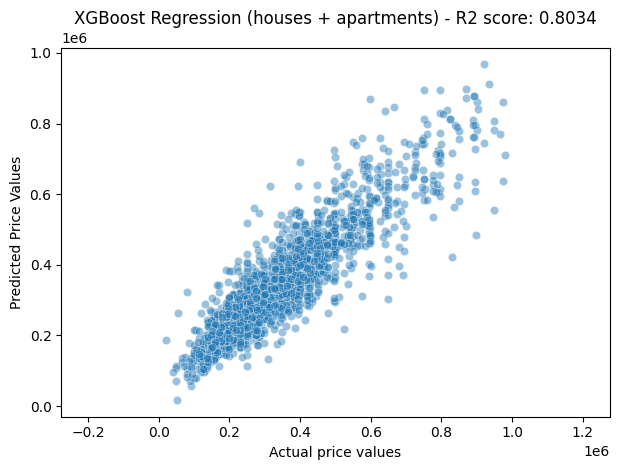

In [ ]:
from src.model_functions import train_XGBoost_regression

y_test, y_preds = train_XGBoost_regression(X, y, 'XGBoost Regression (houses + apartments)')

## Neural Network (Keras) --> 0.62

In [ ]:
# USE tensorboard --logdir=./log/ to see the tensorboard interactive page
from src.model_functions import train_neural_network

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

epochs = 300
batch_size = 8
# train_neural_network(X,y, epochs, batch_size)

Epoch 1/300
859/859 [==============================] - 2s 2ms/step - loss: 354314.3750
Epoch 2/300
 94/859 [==>...........................] - ETA: 1s - loss: 328485.8125

/home/niko/Desktop/GitHub Projects/ImmoElizaDataAnalysis/.env/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


859/859 [==============================] - 2s 2ms/step - loss: 276566.6875
Epoch 3/300
859/859 [==============================] - 2s 2ms/step - loss: 147245.9844
Epoch 4/300
859/859 [==============================] - 2s 2ms/step - loss: 120191.7891
Epoch 5/300
859/859 [==============================] - 1s 2ms/step - loss: 115824.9844
Epoch 6/300
859/859 [==============================] - 1s 2ms/step - loss: 112227.9062
Epoch 7/300
859/859 [==============================] - 1s 1ms/step - loss: 108885.9297
Epoch 8/300
859/859 [==============================] - 1s 2ms/step - loss: 105766.1016
Epoch 9/300
859/859 [==============================] - 1s 2ms/step - loss: 102923.9297
Epoch 10/300
859/859 [==============================] - 1s 1ms/step - loss: 100339.5781
Epoch 11/300
859/859 [==============================] - 1s 1ms/step - loss: 98065.0078
Epoch 12/300
859/859 [==============================] - 1s 1ms/step - loss: 96068.6875
Epoch 13/300
859/859 [==============================] 

Traceback (most recent call last):
  File "/home/niko/Desktop/GitHub Projects/ImmoElizaDataAnalysis/.env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_48265/813798166.py", line 9, in <module>
    train_neural_network(X,y, epochs, batch_size)
  File "/home/niko/Desktop/GitHub Projects/ImmoElizaDataAnalysis/src/model_functions.py", line 165, in train_neural_network
  File "/home/niko/Desktop/GitHub Projects/ImmoElizaDataAnalysis/.env/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/home/niko/Desktop/GitHub Projects/ImmoElizaDataAnalysis/.env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1742, in fit
    tmp_logs = self.train_function(iterator)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/niko/Desktop/GitHub Projects/ImmoElizaDa

## Stochastic Gradient Descent - SGDRegressor --> score: 0.58

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 81424.5157
Mean squared error = 12232534670.2311
Median absolute error = 64034.2173
Explain variance score = 0.5887
R2 score *coefficient of Determination = 0.5886
--------------------------------------
TRAINING SCORE: 0.5761835100551816
TESTING SCORE: 0.5886491746711209
--------------------------------------
Cross validation scores: 
 [0.539397   0.54700794 0.56154942 0.55721588 0.58819347 0.58195374
 0.59171155 0.55868158 0.60948462 0.56680469]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


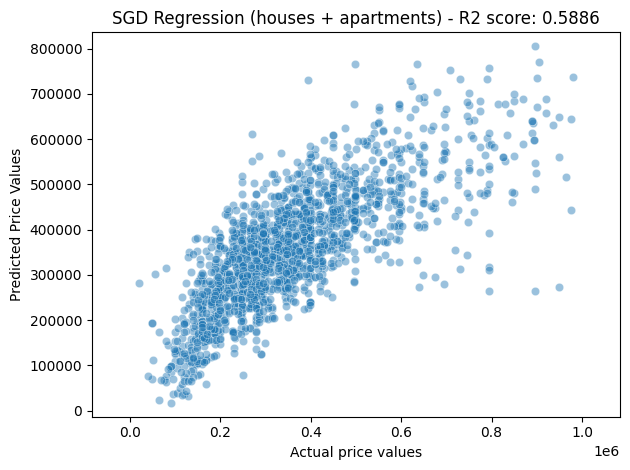

In [ ]:
from src.model_functions import train_SGDregressor

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

train_SGDregressor(X, y, 'SGD Regression (houses + apartments)')

# 3. Training on split Type Houses and Apartments

In [ ]:
df_house = new_df[new_df['property_type_HOUSE'] == 1]
df_app = new_df[new_df['property_type_APARTMENT'] == 1]

X_house = df_house.drop(columns=['price'], axis=1)
y_house = df_house['price']

X_app = df_app.drop(columns=['price'], axis=1)
y_app = df_app['price']

## Linear Regression

### House --> 0.63

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 78656.5337
Mean squared error = 11344728018.8809
Median absolute error = 59584.0
Explain variance score = 0.632
R2 score *coefficient of Determination = 0.6309
--------------------------------------
TRAINING SCORE: 0.6716441120417997
TESTING SCORE: 0.6309056548707214
--------------------------------------


Cross validation scores: 
 [0.65742856 0.67212323 0.65248232 0.659429   0.64124224 0.67348972
 0.65805296 0.66971892 0.67797175 0.68864123]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


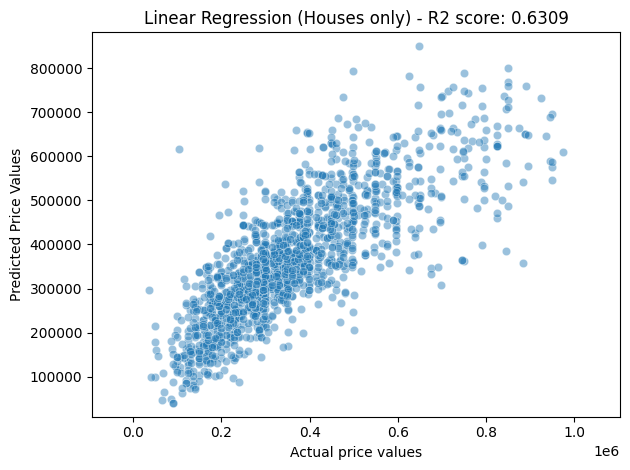

(array([250464., 228560., 215744., ..., 850976., 282896., 288720.]),
 1342    210000.0
 7094    229000.0
 4817    229000.0
 1404    365000.0
 9374    450000.0
           ...   
 5939    149000.0
 5610    295000.0
 476     649000.0
 6347    195000.0
 8483    175000.0
 Name: price, Length: 1469, dtype: float64)

In [ ]:
from src.model_functions import train_linear_regr
import matplotlib.pyplot as plt

train_linear_regr(X_house,y_house, 'Linear Regression (Houses only)')

### Apartments --> 0.42

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 82594.3468
Mean squared error = 13707318764.9881
Median absolute error = 60392.0
Explain variance score = 0.4293
R2 score *coefficient of Determination = 0.4279
--------------------------------------
TRAINING SCORE: 0.47898402514169414
TESTING SCORE: 0.427858991005727
--------------------------------------


Cross validation scores: 
 [-6.79368252e+19  4.85540404e-01  4.29287833e-01  4.05580740e-01
  4.05419514e-01  4.16702634e-01  4.52918926e-01  5.41011552e-01
  5.02146144e-01  4.69250912e-01]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


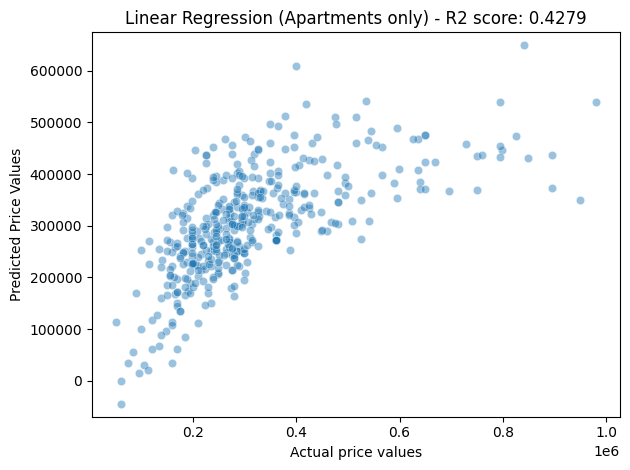

(array([ 3.88096e+05,  4.32000e+05,  2.32448e+05,  1.50784e+05,
         2.99520e+04,  3.34848e+05,  2.77504e+05,  1.69216e+05,
         4.27008e+05,  2.91584e+05,  2.76224e+05,  1.84576e+05,
         2.24512e+05,  3.64032e+05,  2.11968e+05,  3.16416e+05,
         3.92192e+05,  2.74176e+05,  2.02240e+05,  3.08736e+05,
         3.24992e+05,  2.28096e+05,  2.50880e+05,  4.17280e+05,
         1.12896e+05,  4.17024e+05,  9.71520e+04,  2.90304e+05,
         4.60800e+05,  1.44128e+05,  3.03232e+05,  2.91328e+05,
         3.86944e+05,  1.97120e+05,  2.89792e+05,  4.35456e+05,
         2.50880e+05,  3.14880e+05,  3.13088e+05,  2.25280e+05,
         3.29088e+05,  3.64032e+05,  3.07712e+05,  3.08480e+05,
         2.46784e+05,  3.16032e+05,  3.07712e+05,  3.72224e+05,
         2.14784e+05,  4.39296e+05,  3.40480e+05,  3.61472e+05,
         3.92832e+05,  2.01216e+05,  1.60768e+05,  2.76992e+05,
         2.54976e+05,  2.97984e+05,  3.08224e+05,  4.67456e+05,
         3.24608e+05,  3.59424e+05,  5.4

In [ ]:
# NOT ENOUGH DATAPOINTS - IF SKEWED RESULT --> REMOVE POSTCODE ABBR feature
train_linear_regr(X_app,y_app, 'Linear Regression (Apartments only)')

## KNN nearest neighbour

### House

Scores for the initial training (Without GridSearch)
General metrics for Linear models: 
--------------------------------------
Mean absolute error = 85464.6829
Mean squared error = 14108628995.5625
Median absolute error = 61571.4286
Explain variance score = 0.5413
R2 score *coefficient of Determination = 0.541
--------------------------------------
TRAINING SCORE: 0.6547324564444603
TESTING SCORE: 0.54098369118039
--------------------------------------
Cross validation scores: 
 [0.59129595 0.5808623  0.56232962 0.57566656 0.56803234 0.62536297
 0.59103167 0.59568289 0.58790762 0.63222373]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


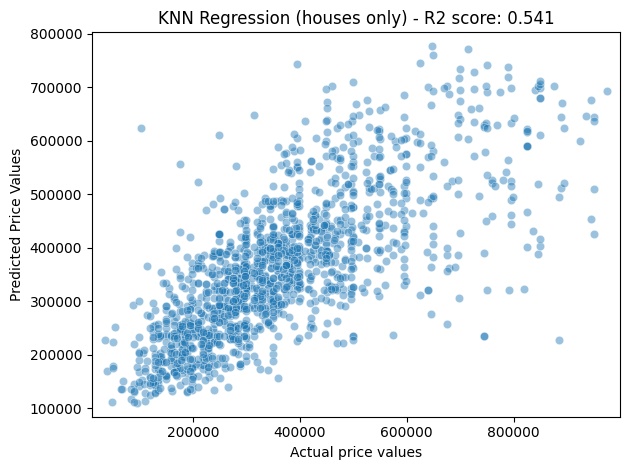

Calculating best parameters through GridSearchCV. . .
Best score: 0.6378995210721687
The Best parameters found from GridSearchCV: {'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'cityblock', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 14, 'p': 2, 'weights': 'distance'}
General metrics for Linear models: 
--------------------------------------
Mean absolute error = 70866.5079
Mean squared error = 11568731168.3563
Median absolute error = 47239.1164
Explain variance score = 0.6237
R2 score *coefficient of Determination = 0.6236
--------------------------------------
TRAINING SCORE: 0.999765394940186
TESTING SCORE: 0.6236178383955329
--------------------------------------
Cross validation scores: 
 [0.65520714 0.64413214 0.62356329 0.63494463 0.61880427 0.68727865
 0.63218958 0.62279167 0.65115438 0.68209554]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


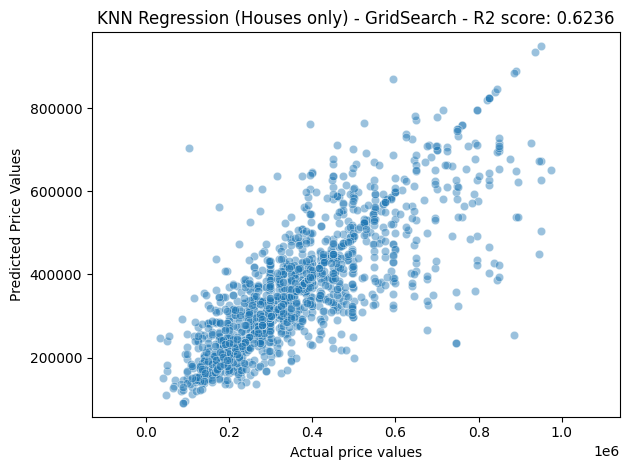

In [ ]:
# Train the model (KNeighborsRegressor) with n_neighbors as 14 (see gridsearch below- best ne niegnbours)
params = {'n_neighbors':14}
print("Scores for the initial training (Without GridSearch)")
model, X_train, X_test, y_train, y_test = train_knn_regr(X_house,y_house, 'KNN Regression (houses only)', **params)

# implementing GridSearch
# Check for the best n_neighbor and other hyperparameters

from sklearn.model_selection import GridSearchCV

params = {"n_neighbors": np.arange(10,15), 
          "metric": ["euclidean", "cityblock"],
          "weights":['uniform', 'distance'],
          "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

print('Calculating best parameters through GridSearchCV. . .')
grid = GridSearchCV(estimator=model,param_grid=params)
grid.fit(X_train, y_train)
print(f'Best score: {grid.best_score_}')

# Retrain the model with the optimal parameters

best_params = grid.best_estimator_.get_params()
print(f"The Best parameters found from GridSearchCV: {best_params}")

model, X_train, X_test, y_train, y_test = train_knn_regr(X_house,y_house, 'KNN Regression (Houses only) - GridSearch', **best_params)


### Apartments

Scores for the initial training (Without GridSearch)
General metrics for Linear models: 
--------------------------------------
Mean absolute error = 79392.2574
Mean squared error = 13628868626.8734
Median absolute error = 55271.4286
Explain variance score = 0.4319
R2 score *coefficient of Determination = 0.4311
--------------------------------------
TRAINING SCORE: 0.4706776018972737
TESTING SCORE: 0.4311334855984523
--------------------------------------
Cross validation scores: 
 [0.46032972 0.27914073 0.25520822 0.42719012 0.30283208 0.4274735
 0.32258478 0.43152421 0.45872109 0.39951993]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


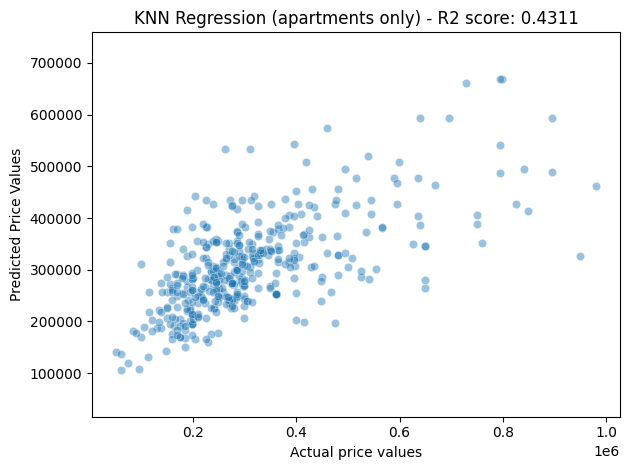

Calculating best parameters through GridSearchCV. . .
Best score: 0.4562315549262932
The Best parameters found from GridSearchCV: {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'cityblock', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 14, 'p': 2, 'weights': 'distance'}
General metrics for Linear models: 
--------------------------------------
Mean absolute error = 66937.5478
Mean squared error = 11967809690.8965
Median absolute error = 40000.0
Explain variance score = 0.5012
R2 score *coefficient of Determination = 0.5005
--------------------------------------
TRAINING SCORE: 0.9985756950301382
TESTING SCORE: 0.5004657855122938
--------------------------------------
Cross validation scores: 
 [0.53468168 0.34197859 0.35741698 0.62196682 0.45500759 0.53274383
 0.41502248 0.47531381 0.54343687 0.53780485]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


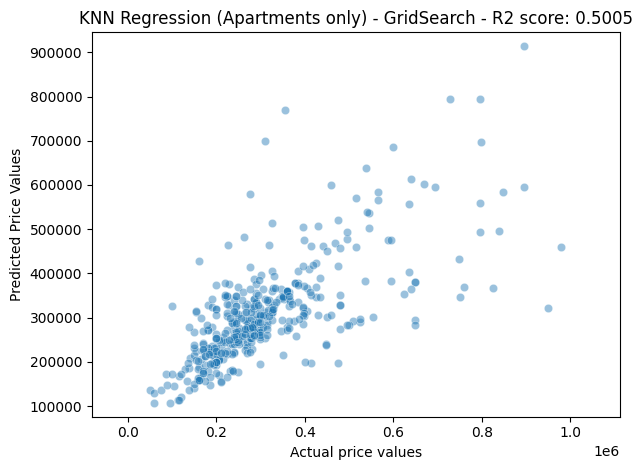

In [ ]:
# Train the model (KNeighborsRegressor) with n_neighbors as 14 (see gridsearch below- best ne niegnbours)
params = {'n_neighbors':14}
print("Scores for the initial training (Without GridSearch)")
model, X_train, X_test, y_train, y_test = train_knn_regr(X_app,y_app, 'KNN Regression (apartments only)', **params)

# implementing GridSearch
# Check for the best n_neighbor and other hyperparameters

from sklearn.model_selection import GridSearchCV

params = {"n_neighbors": np.arange(10,15), 
          "metric": ["euclidean", "cityblock"],
          "weights":['uniform', 'distance'],
          "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

print('Calculating best parameters through GridSearchCV. . .')
grid = GridSearchCV(estimator=model,param_grid=params)
grid.fit(X_train, y_train)
print(f'Best score: {grid.best_score_}')

# Retrain the model with the optimal parameters

best_params = grid.best_estimator_.get_params()
print(f"The Best parameters found from GridSearchCV: {best_params}")

model, X_train, X_test, y_train, y_test = train_knn_regr(X_app,y_app, 'KNN Regression (Apartments only) - GridSearch', **best_params)


## HuberRegression

### House

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 77494.2771
Mean squared error = 11556908912.9665
Median absolute error = 57065.9749
Explain variance score = 0.6244
R2 score *coefficient of Determination = 0.624
--------------------------------------
TRAINING SCORE: 0.6637142631223514
TESTING SCORE: 0.6240024688250836
--------------------------------------
Cross validation scores: 
 [0.65051602 0.65947206 0.64631469 0.65803661 0.63305784 0.66641404
 0.652217   0.6678057  0.6664528  0.6856284 ]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


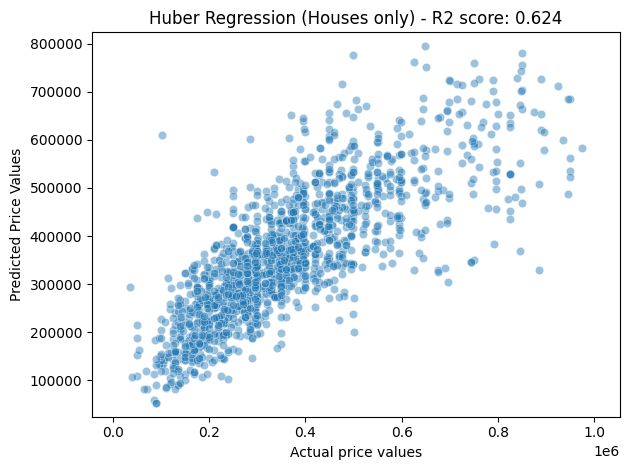

In [ ]:
from src.model_functions import train_huberregressor

train_huberregressor(X_house,y_house, 'Huber Regression (Houses only)')

### Apartments

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 79328.8198
Mean squared error = 15326031345.7778
Median absolute error = 52983.8193
Explain variance score = 0.3843
R2 score *coefficient of Determination = 0.3603
--------------------------------------
TRAINING SCORE: 0.41027530068386586
TESTING SCORE: 0.3602942203074433
--------------------------------------
Cross validation scores: 
 [0.39105602 0.43792702 0.33212374 0.41573569 0.30863224 0.42038837
 0.40026254 0.45858344 0.41495599 0.33925622]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


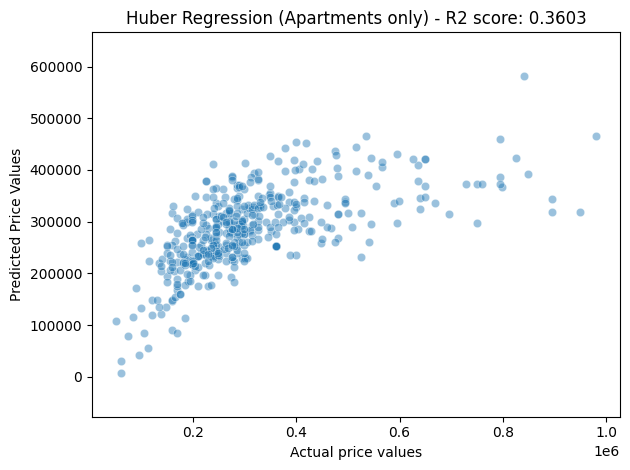

In [ ]:
from src.model_functions import train_huberregressor

train_huberregressor(X_app,y_app, 'Huber Regression (Apartments only)')

## Decision Tree Regression

### House

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 79440.3227
Mean squared error = 14233933203.2172
Median absolute error = 51000.0
Explain variance score = 0.5372
R2 score *coefficient of Determination = 0.5369
--------------------------------------
TRAINING SCORE: 0.999765394940186
TESTING SCORE: 0.536906989263054
--------------------------------------
Cross validation scores: 
 [0.51610053 0.51628726 0.49438622 0.54415198 0.55306201 0.5603012
 0.53452474 0.52464517 0.52491731 0.57330307]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


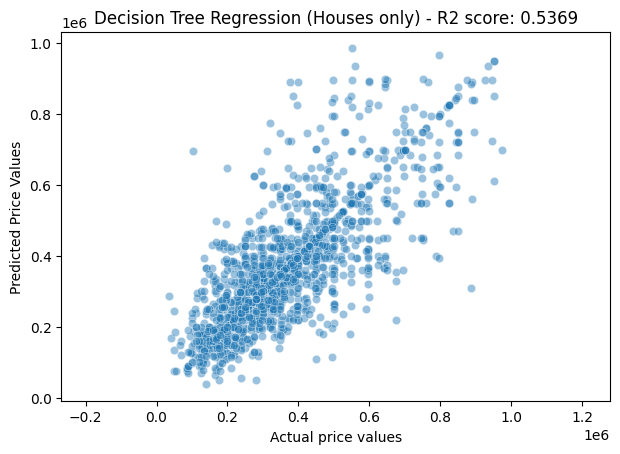

In [ ]:
from src.model_functions import train_decessiontree_regression

train_decessiontree_regression(X_house, y_house, 'Decision Tree Regression (Houses only)')

### Apartments

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 68440.943
Mean squared error = 12220085540.413
Median absolute error = 36000.0
Explain variance score = 0.4916
R2 score *coefficient of Determination = 0.4899
--------------------------------------
TRAINING SCORE: 0.9985756950301382
TESTING SCORE: 0.4899358371276413
--------------------------------------
Cross validation scores: 
 [0.30254173 0.37597892 0.47945936 0.38952734 0.55871482 0.53160387
 0.45782017 0.39746182 0.7107334  0.51032932]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


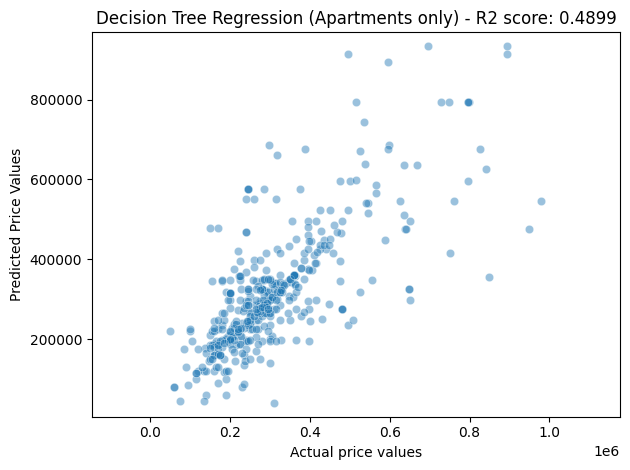

In [ ]:
from src.model_functions import train_decessiontree_regression

train_decessiontree_regression(X_app, y_app, 'Decision Tree Regression (Apartments only)')

## XGBoost

### House --> score: 0.76

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 59820.5286
Mean squared error = 7440554949.7951
Median absolute error = 40971.3281
Explain variance score = 0.7609
R2 score *coefficient of Determination = 0.7608
--------------------------------------
TRAINING SCORE: 0.9456457539296447
TESTING SCORE: 0.7608427061758977
--------------------------------------
Cross validation scores: 
 [0.7626534  0.78068538 0.74327949 0.77171942 0.79666323 0.77542566
 0.77471706 0.76724273 0.75806482 0.79102736]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


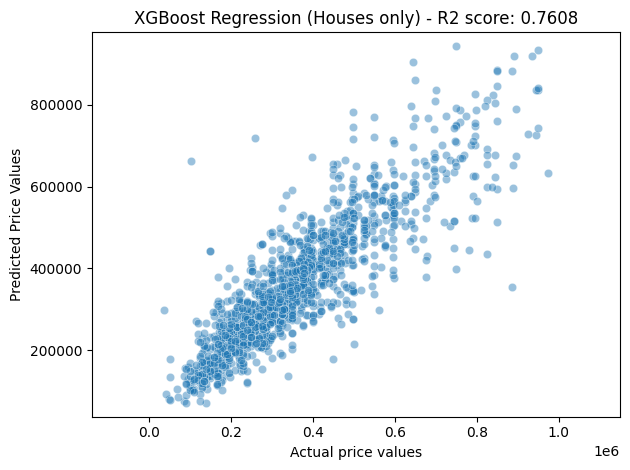

(1342     210000.0
 7094     229000.0
 4817     229000.0
 1404     365000.0
 9374     450000.0
            ...   
 483      720000.0
 10425    180000.0
 3442     345000.0
 3631     610000.0
 6588     349000.0
 Name: price, Length: 1336, dtype: float64,
 array([213249.42, 167600.53, 212358.03, ..., 344897.7 , 555479.06,
        212045.44], dtype=float32))

In [ ]:
# HOUSE PREDICTIONS
from src.model_functions import train_XGBoost_regression

train_XGBoost_regression(X_house, y_house, 'XGBoost Regression (Houses only)')

### Apartments --> score: 0.71

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 50910.9978
Mean squared error = 6467832544.3885
Median absolute error = 30830.8203
Explain variance score = 0.7109
R2 score *coefficient of Determination = 0.7109
--------------------------------------
TRAINING SCORE: 0.985156908241426
TESTING SCORE: 0.7108958894027468
--------------------------------------
Cross validation scores: 
 [0.75530291 0.5759087  0.68789167 0.65860443 0.80743173 0.7009887
 0.75347213 0.749243   0.76952    0.74819887]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


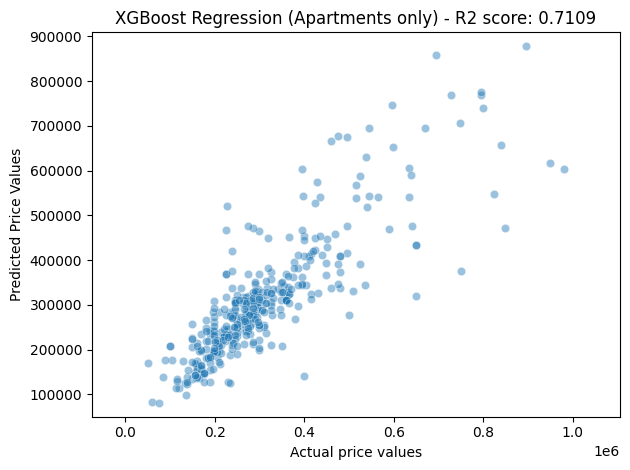

(123      259000.0
 10186    849000.0
 926      230000.0
 3599     169000.0
 7428     105000.0
            ...   
 254      650000.0
 4343     326000.0
 2870     228544.0
 10012    220000.0
 3664     299000.0
 Name: price, Length: 382, dtype: float64,
 array([336931.25 , 472522.3  , 230527.9  , 197487.67 , 175967.53 ,
        335505.25 , 255825.69 , 127863.375, 450306.8  , 277100.25 ,
        235042.36 , 204989.69 , 183096.3  , 695942.6  , 240615.56 ,
        361611.62 , 372988.84 , 587062.3  , 197142.42 , 291513.38 ,
        265382.22 , 197983.1  , 300381.44 , 374291.2  , 169262.61 ,
        387605.34 , 134270.62 , 392743.78 , 325650.03 , 144624.9  ,
        236733.4  , 251577.12 , 328326.   , 157440.25 , 209296.53 ,
        374605.75 , 188235.78 , 181800.47 , 382610.   , 135416.36 ,
        335205.   , 343086.12 , 457311.56 , 286179.97 , 243459.3  ,
        316845.75 , 301397.03 , 339691.7  , 192634.5  , 450499.6  ,
        466058.25 , 414651.1  , 196861.67 , 162933.23 , 137825.47 ,


In [ ]:
# HOUSE PREDICTIONS
from src.model_functions import train_XGBoost_regression

train_XGBoost_regression(X_app, y_app, 'XGBoost Regression (Apartments only)')

## Neural network (Keras)

### House --> score: 0.61

In [ ]:
from src.model_functions import train_neural_network

# USE tensorboard --logdir=./log/ to see the tensorboard interactive page
# Increasing epochs --> model scores up to 0.64

epochs = 300
batch_size = 8
# train_neural_network(X_house,y_house, epochs, batch_size)

Epoch 1/300
668/668 [==============================] - 2s 2ms/step - loss: 372389.5938
Epoch 2/300
 81/668 [==>...........................] - ETA: 1s - loss: 370519.1250

/home/niko/Desktop/GitHub Projects/ImmoElizaDataAnalysis/.env/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


668/668 [==============================] - 2s 2ms/step - loss: 335804.2500
Epoch 3/300
668/668 [==============================] - 2s 3ms/step - loss: 228646.8281
Epoch 4/300
668/668 [==============================] - 2s 3ms/step - loss: 140467.8125
Epoch 5/300
668/668 [==============================] - 2s 2ms/step - loss: 124075.0625
Epoch 6/300
668/668 [==============================] - 2s 3ms/step - loss: 119089.9141
Epoch 7/300
668/668 [==============================] - 2s 3ms/step - loss: 114767.3438
Epoch 8/300
668/668 [==============================] - 2s 2ms/step - loss: 110778.4375
Epoch 9/300
668/668 [==============================] - 2s 3ms/step - loss: 107063.6719
Epoch 10/300
668/668 [==============================] - 2s 2ms/step - loss: 103552.7656
Epoch 11/300
668/668 [==============================] - 2s 2ms/step - loss: 100263.3828
Epoch 12/300
668/668 [==============================] - 2s 3ms/step - loss: 97164.6250
Epoch 13/300
668/668 [==============================]

### Apartments --> score: 0.33

In [ ]:
# USE tensorboard --logdir=./log/ to see the tensorboard interactive page
epochs = 300
batch_size = 8
# train_neural_network(X_app, y_app, epochs, batch_size)

Epoch 1/300
191/191 [==============================] - 1s 2ms/step - loss: 315004.0000
Epoch 2/300
 74/191 [==========>...................] - ETA: 0s - loss: 320183.3438

/home/niko/Desktop/GitHub Projects/ImmoElizaDataAnalysis/.env/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


191/191 [==============================] - 0s 2ms/step - loss: 314594.6250
Epoch 3/300
191/191 [==============================] - 0s 2ms/step - loss: 313093.6562
Epoch 4/300
191/191 [==============================] - 0s 2ms/step - loss: 309871.1250
Epoch 5/300
191/191 [==============================] - 0s 2ms/step - loss: 304353.5625
Epoch 6/300
191/191 [==============================] - 0s 2ms/step - loss: 296018.8125
Epoch 7/300
191/191 [==============================] - 1s 3ms/step - loss: 284536.3125
Epoch 8/300
191/191 [==============================] - 1s 3ms/step - loss: 269545.0312
Epoch 9/300
191/191 [==============================] - 0s 2ms/step - loss: 250860.3750
Epoch 10/300
191/191 [==============================] - 1s 3ms/step - loss: 228437.0000
Epoch 11/300
191/191 [==============================] - 0s 2ms/step - loss: 202474.0781
Epoch 12/300
191/191 [==============================] - 0s 2ms/step - loss: 174474.9219
Epoch 13/300
191/191 [==============================

## SGD Regression

### House

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 79516.6009
Mean squared error = 11675351056.3866
Median absolute error = 59135.729
Explain variance score = 0.6268
R2 score *coefficient of Determination = 0.6247
--------------------------------------
TRAINING SCORE: 0.6693112771035364
TESTING SCORE: 0.6247261955684229
--------------------------------------


Cross validation scores: 
 [0.66702508 0.65338058 0.65501079 0.65590574 0.63902999 0.67058428
 0.66442203 0.66426934 0.67891366 0.6926331 ]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


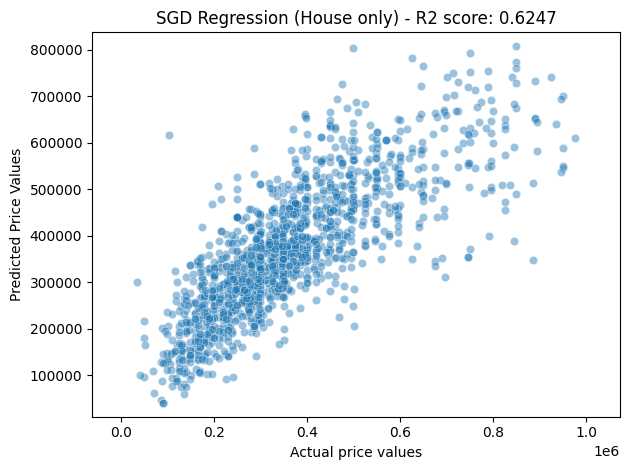

In [ ]:
from src.model_functions import train_SGDregressor

train_SGDregressor(X_house, y_house, 'SGD Regression (House only)')

### Apartments

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 79887.7487
Mean squared error = 12982291618.7268
Median absolute error = 57754.1837
Explain variance score = 0.4201
R2 score *coefficient of Determination = 0.4197
--------------------------------------
TRAINING SCORE: 0.47337317150340974
TESTING SCORE: 0.4197076306184626
--------------------------------------
Cross validation scores: 
 [0.38487617 0.50562724 0.40607656 0.5190112  0.42554763 0.39099425
 0.44424497 0.47032247 0.47751708 0.45772688]
--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


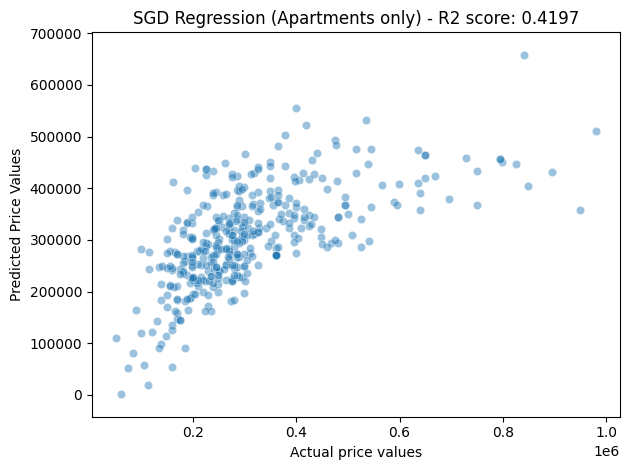

In [ ]:
from src.model_functions import train_SGDregressor

train_SGDregressor(X_app, y_app, 'SGD Regression (Apartments only)')